In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, classification_report, cohen_kappa_score
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import random

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers

%matplotlib inline

TensorFlow 2.x selected.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving fs_abc.csv to fs_abc.csv


In [4]:
data = pd.read_csv("fs_abc.csv") 
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr6,Atr7,Atr10,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr22,Atr26,Atr28,Atr31,Atr32,Atr34,Atr35,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,2,2,0,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,0,0,4,3,4,0,4,4,4,4,1,1,0,0,4,3,0,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,3,2,2,4,2,3,3,3,3,3,0,2,2,3,3,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,4,3,3,3,3,1,1,1,2,3,2,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,0,0,1,0,1,1,1,1,1,0,2,2,1,1,1,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [269]:
'''
summary = data.describe()
summary
'''

'\nsummary = data.describe()\nsummary\n'

In [270]:
'''
correlation = data.corr()
correlation.head()
'''

'\ncorrelation = data.corr()\ncorrelation.head()\n'

In [271]:
'''
plt.figure(figsize=(10,10)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

sns.heatmap(data.corr())
'''

'\nplt.figure(figsize=(10,10)) \n# play with the figsize until the plot is big enough to plot all the columns\n# of your dataset, or the way you desire it to look like otherwise\n\nsns.heatmap(data.corr())\n'

In [0]:
X = data.loc[:, 'Atr1':'Atr54']
y = data[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**LOGISTIC REGRESSION**

In [273]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
y_pred_logreg = logreg.predict(X_test)
Logistic = logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [275]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)

[[26  1]
 [ 1 23]]


In [276]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.96      0.96      0.96        24

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



In [277]:
# calculate the fpr and tpr for all thresholds of the classification
model_lg = logreg.fit(X_train, y_train)
probs = model_lg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


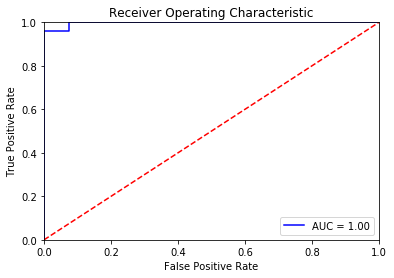

In [278]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

kappa statistic is a measure of how closely the instances classified by the machine learning classifier matched the data labeled as ground truth, controlling for the accuracy of a random classifier as measured by the expected accuracy.

Accuracy is the percentage of correctly classifies instances out of all instances. ... Kappa or Cohen's Kappa is like classification accuracy, except that it is normalized at the baseline of random chance on your dataset.

In [279]:
logreg_ks = cohen_kappa_score(y_test, y_pred_logreg)
logreg_ks

0.9212962962962963

**LINEAR DISCRIMINANT ANALYSIS**

In [280]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)

print(model_lda.priors_)

[0.49579832 0.50420168]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [281]:
y_pred_lda = model_lda.predict(X_test)
print(np.unique(y_pred_lda, return_counts=True))

(array([0, 1]), array([29, 22]))


In [282]:
print(confusion_matrix(y_pred_lda, y_test))
print(classification_report(y_test, y_pred_lda, digits=3))

[[27  2]
 [ 0 22]]
              precision    recall  f1-score   support

           0      0.931     1.000     0.964        27
           1      1.000     0.917     0.957        24

    accuracy                          0.961        51
   macro avg      0.966     0.958     0.960        51
weighted avg      0.963     0.961     0.961        51



In [283]:
Linear = accuracy_score(y_test, y_pred_lda)
print(Linear)

0.9607843137254902


In [284]:
lda_ks = cohen_kappa_score(y_test, y_pred_lda)
lda_ks

0.9209302325581395

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


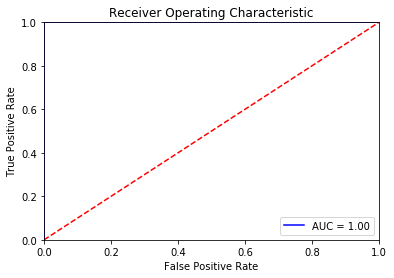

In [285]:
# calculate the fpr and tpr for all thresholds of the classification
model_lda = lda.fit(X_train, y_train)
probs_lda = model_lda.predict_proba(X_test)
preds_lda = probs_lda[:,1]
fpr_lda, tpr_lda, threshold_lda = metrics.roc_curve(y_test, preds_lda)
roc_auc = metrics.auc(fpr_lda, tpr_lda)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**QUADRATIC DISCRIMINANT ANALYSIS**

In [286]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [287]:
y_pred_qda = model_qda.predict(X_test)
print(np.unique(y_pred_qda, return_counts=True))
print(confusion_matrix(y_pred_qda, y_test))
print(classification_report(y_test, y_pred_qda, digits=3))

(array([0, 1]), array([31, 20]))
[[27  4]
 [ 0 20]]
              precision    recall  f1-score   support

           0      0.871     1.000     0.931        27
           1      1.000     0.833     0.909        24

    accuracy                          0.922        51
   macro avg      0.935     0.917     0.920        51
weighted avg      0.932     0.922     0.921        51



In [288]:
Quadratic = accuracy_score(y_test, y_pred_qda)
print(Quadratic)

0.9215686274509803


In [289]:
qda_ks = cohen_kappa_score(y_test, y_pred_qda)
qda_ks

0.8411214953271028

**K-Nearest Neighbors**

In [0]:
knn = KNeighborsClassifier(n_neighbors = 10)


In [291]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
y_pred_knn = knn.predict(X_test)


In [0]:
#actual = y_test.to_numpy()


In [0]:
#mse = (((y_pred_knn - actual) ** 2).sum()) / len(y_pred_knn)
#mse

In [293]:
knn_10 = accuracy_score(y_test, y_pred_knn)
knn_10

0.9607843137254902

In [294]:
knn_ks = cohen_kappa_score(y_test, y_pred_knn)
knn_ks

0.9209302325581395

**RANDOM FOREST**

In [295]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_predict = rfc.predict(X_test)

In [297]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring= 'roc_auc')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

In [298]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[27  0]
 [ 1 23]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.96      0.98        24

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



=== All AUC Scores ===
[0.94444444 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9944444444444445


In [299]:
RandomForest = accuracy_score(y_test, rfc_predict)
print(RandomForest)

0.9803921568627451


In [300]:
rfc_ks = cohen_kappa_score(y_test, rfc_predict)
rfc_ks

0.9605568445475638

**Decision Tree**

Optimizing Decision Tree Performance

criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [324]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

DT = accuracy_score(y_test, y_pred_dt)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.9215686274509803


In [325]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_dt))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.88      0.96      0.92        24

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51





In [326]:
dt_ks = cohen_kappa_score(y_test, y_pred_dt)
dt_ks

0.8433179723502304

**Support Vector Machine**

In [305]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_svm = svclassifier.predict(X_test)



In [307]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[27  0]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.92      0.96        24

    accuracy                           0.96        51
   macro avg       0.97      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



In [308]:
SVM_Score = accuracy_score(y_test, y_pred_svm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9607843137254902


In [309]:
svm_ks = cohen_kappa_score(y_test, y_pred_svm)
svm_ks

0.9209302325581395

**DEEP NEURAL NETWORK**

In [0]:
dataframe = data

In [0]:
#x-train, x-test, y-train, y-test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [7]:
train, test = train_test_split(dataframe, test_size=0.3)
train, val = train_test_split(train, test_size=0.3)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

83 train examples
36 validation examples
51 test examples


In [0]:
feature_columns = []

# numeric cols
for header in ['Atr1', 'Atr2', 'Atr3', 'Atr4',  'Atr6', 'Atr7', 'Atr10', 
                'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17', 'Atr18',  
               'Atr22', 'Atr26',  'Atr28',  
               'Atr31', 'Atr32', 'Atr34', 'Atr35', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 
               'Atr41', 'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50', 
               'Atr51', 'Atr52', 'Atr53', 'Atr54'
              ]:
  feature_columns.append(feature_column.numeric_column(header))

In [0]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [0]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Class')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

the Optimizer, we are using ‘Adam’ (Adaptive Moment Estimation) 
in our case. Other optimizers maintain a single learning rate through 
out the training process, where as Adam adopts the learning rate as the 
training progresses (adaptive learning rates). Adam combines the advantages of 
two other extentsions of SGD (stochastic gradient descent), namely Root Mean Square 
Propagation(RMSProp) and Adaptive Gradient Algorithm (AdaGrad). It takes 
advantage of the biggest pros of RMSProp, and combine them with ideas known from momentum optimization.

Next argument is ‘metrics’, which is used to judge the performance of our model. 
Which is similar to a loss function, except that the results from evaluating a metric 
are not used when training the model. We are using accuracy (‘acc’) as our metric and it 
return a single tensor value representing the mean value across all datapoints.

After compiling we can train the model using the ‘fit’ method. we use the 
training set (x_train,y_train) for training the model. I have run the model for 
500 epochs with a batch_size of 20. Batch_size is again a random number (ideally 10 to 124) 
depends on the amount of data we have, it determines the number of training examples 
utilized in one iteration. Thus in a given epoch we will have many iterations. 
Verbose can be set to 0 or 1, it turns on/off the log output from each epoch. We can 
provide the validation_data on which to evaluate the loss and any model metrics at the 
end of each epoch using validation_data argument, model will not be trained on this validation data.

In [12]:
model = tf.keras.Sequential([
  feature_layer,                          #first hidden layer we need to specify number of input dimensions 
  layers.Dense(128, activation='relu'),  #I used ‘relu’ for the hidden layer as it provides better performance than the ‘tanh’
  layers.Dense(128, activation='relu'),   #I used ‘relu’ for the hidden layer as it provides better performance than the ‘tanh’
  layers.Dense(1, activation='sigmoid')   #used ‘sigmoid’ for the output layer as this is a binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
3/3 [==============================] - 2s 786ms/step - loss: 0.6235 - accuracy: 0.5301 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 0s 17ms/step - loss: 0.4262 - accuracy: 0.8434 - val_loss: 0.4053 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 0.2863 - accuracy: 0.9639 - val_loss: 0.2840 - val_accuracy: 0.9722
Epoch 4/5
3/3 [==============================] - 0s 18ms/step - loss: 0.1861 - accuracy: 0.9880 - val_loss: 0.2021 - val_accuracy: 0.9722
Epoch 5/5
3/3 [==============================] - 0s 19ms/step - loss: 0.1232 - accuracy: 1.0000 - val_loss: 0.1415 - val_accuracy: 0.9722


In [13]:
loss, accuracy_dnn = model.evaluate(test_ds)

print("Accuracy", accuracy_dnn)

2/2 [==============================] - 0s 5ms/step - loss: 0.1476 - accuracy: 0.9608
Accuracy 0.9607843


In [0]:

#yhat_probs = model.predict(test_ds)
#yhat_probs.shape

In [0]:
#svm_ks = cohen_kappa_score(y_test, yhat_probs)
#svm_ks

**COMPARISON**

In [327]:
Accuracy_Comparison = pd.DataFrame({'Logistic Regression': [Logistic], 
                           'Linear Discriminant Analysis': [Linear], 
                           'Quadratic Discriminant Analysis': [Quadratic], 
                            'K-Nearest Neighbors': [knn_10],
                           'Random Forest': [RandomForest],
                           'Decision Tree': [DT],
                           'Support Vector Machine': [SVM_Score],
                           'Deep Neural Network': [accuracy_dnn]
                           }, index = None)
Accuracy_Comparison

,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,K-Nearest Neighbors,Random Forest,Decision Tree,Support Vector Machine,Deep Neural Network
0,0.960784,0.960784,0.921569,0.960784,0.980392,0.921569,0.960784,1.0


In [322]:
KappaScore_Comparison = pd.DataFrame({'Logistic Regression': [logreg_ks], 
                           'Linear Discriminant Analysis': [lda_ks], 
                           'Quadratic Discriminant Analysis': [qda_ks], 
                            'K-Nearest Neighbors': [knn_ks],
                           'Random Forest': [rfc_ks],
                           'Decision Tree': [dt_ks],
                           'Support Vector Machine': [svm_ks]
                           #'Deep Neural Network': [accuracy_dnn]
                           }, index = None)
KappaScore_Comparison

,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,K-Nearest Neighbors,Random Forest,Decision Tree,Support Vector Machine
0,0.921296,0.92093,0.841121,0.92093,0.960557,0.843318,0.92093
